In [3]:
# EDA
#import pandas_profiling as pp
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
def create_labels(n):
    labels = []
    for i in range(0, len(n)-1):
        if i < len(n) -1:
            labels.append(str(n[i]) + " and " + str(n[i + 1]))
    return labels


def create_bins(bin_size, data, column):
    bins = np.arange(data[column].min()-1, data[column].max(), bin_size)
    labels = create_labels(bins)
    return pd.cut(x=data[column],bins = bins, labels = labels)

In [8]:
df = pd.read_csv("../data/raw/Speed_Dating.csv",encoding='latin')

In [9]:
df.shape

(8378, 195)

In [25]:
# select columns containing information the partner fills in
# importance of same race, their race, preference of: attractiveness, 
# sincerity, interesting, funny, ambitious, has shared hobbies, likable.
# importance of religion, different hobbies and how they rate themselves

df_preference = df[["iid", "match", "wave", "samerace", "age", "race", "field_cd",
           "pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha", "zipcode", "career", "income",
           "imprace", "imprelig", "go_out", "from",
           "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming",
           "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping",
           "yoga", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1",
           "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "exphappy"]]

df_preference.shape

(8378, 48)

In [34]:
# missingness
total_datapoints = len(df_preference)
df_miss = pd.DataFrame(df_preference.isnull().sum()/ total_datapoints)
df_miss.reset_index(inplace=True)
df_miss.columns = ["Feature", "% Missing"]


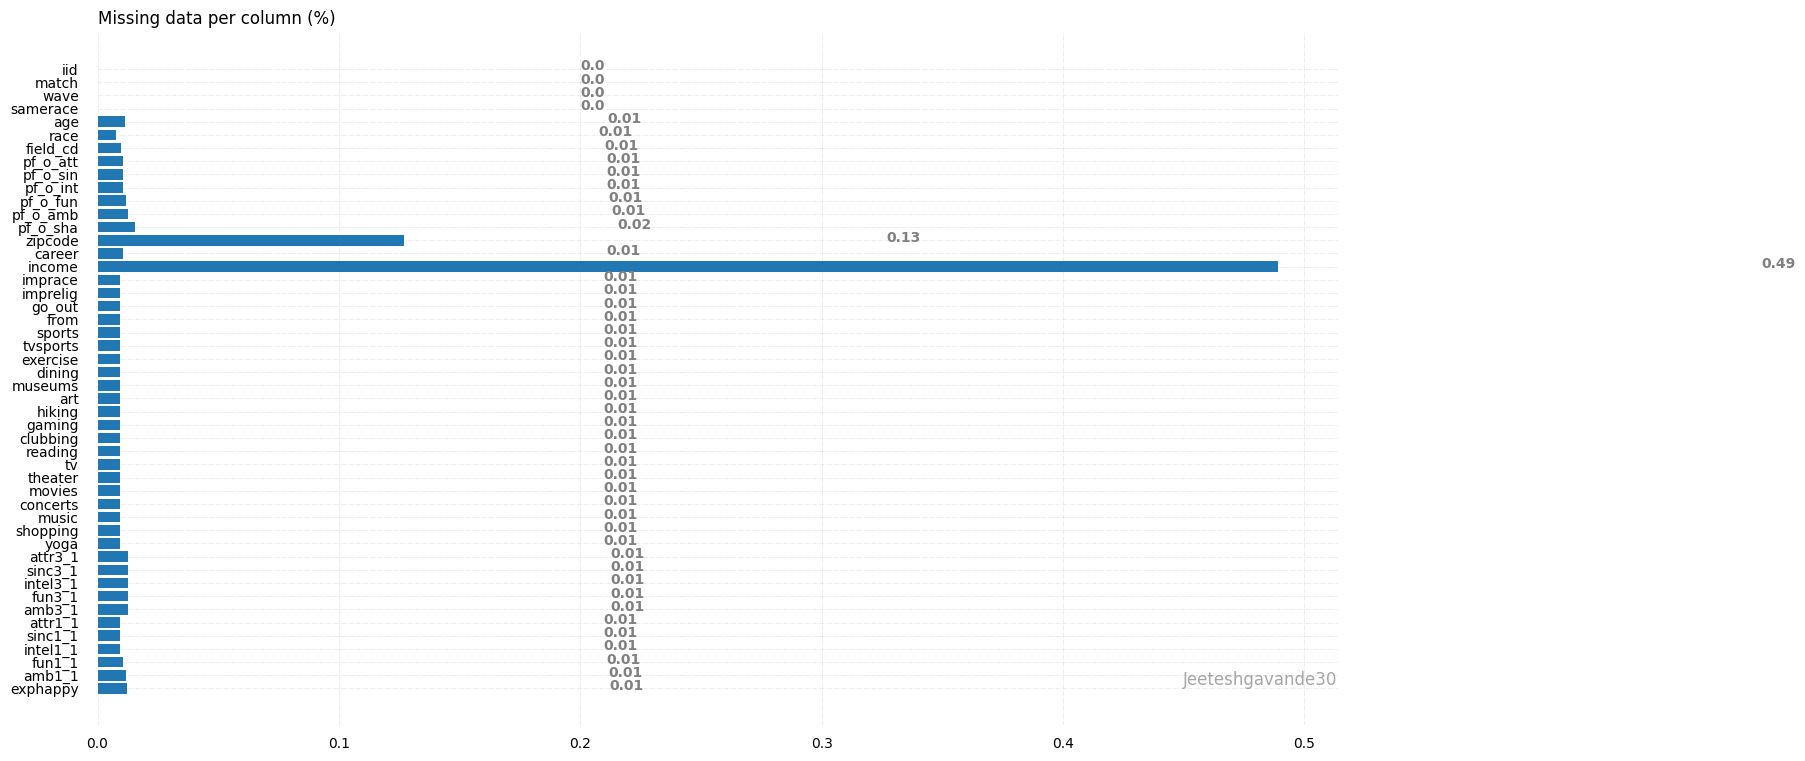

In [67]:
import matplotlib.pyplot as plt

name = df_miss['Feature']
price = df_miss['% Missing']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Missing data per column (%)',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [41]:
no_zip = df_preference[(df_preference["zipcode"]).isnull()][["zipcode", "from"]]
print(no_zip.shape)
no_zip["from"].value_counts()
#new york city, New York , New Jersey

(1064, 2)


Taiwan                                       44
Germany                                      40
Canada                                       37
New Jersey                                   31
Chile                                        31
Israel                                       30
New York                                     29
Colombia                                     25
Milan, Italy                                 22
Bangladesh                                   22
HKG                                          22
UK                                           22
Warsaw, Poland                               21
new york city                                21
Toronto                                      21
czech republic                               21
Mexico                                       21
UNCC                                         21
DC                                           20
Spain                                        20
Cameroon                                

C:\Users\hannah.alexander\AppData\Local\Temp\ipykernel_11560\2998425231.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
df_preference["from"] = df_preference["from"].replace("new york city", "New York")

df_ny_zip = df_preference[df_preference["from"] == "New York"]["zipcode"]
ny_zip = df_ny_zip.loc[df_ny_zip.index[0]]
print("A New York zipcode is: ", ny_zip)

df_nj_zip = df_preference[df_preference["from"] == "New Jersey"]["zipcode"]
nj_zip = df_nj_zip.loc[df_nj_zip.index[0]]
print("A New Jersey zipcode is: ", nj_zip)

m1 = df_preference['zipcode'].isnull()
m2 = df_preference["from"] == "New Jersey"
df_preference.loc[m1 & m2, 'zipcode'] = nj_zip 

m1 = df_preference['zipcode'].isnull()
m2 = df_preference["from"] == "New York"
df_preference.loc[m1 & m2, 'zipcode'] = ny_zip 

df_preference["zipcode"] = df_preference["zipcode"].fillna("Not applicable")

A New York zipcode is:  10,028
A New Jersey zipcode is:  7,661


C:\Users\hannah.alexander\AppData\Local\Temp\ipykernel_11560\3821565538.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

